# PROJET :  Analyse de donnees pour l'entreprise innova electronic

## importation des librairies python

In [3]:
#importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
data = pd.read_csv("ventes-data.csv" )


In [5]:
data

,Month,Product,Units Sold,Revenue
0,January,Smartphone,1000,50000
1,January,Laptop,500,100000
2,January,Tablet,300,45000
3,January,Smart TV,200,25000
4,January,Headphones,800,32000
...,...,...,...,...
583,December,Graphics Tablet,315,15750
584,December,Ink Cartridges,525,26250
585,December,Laptop Stand,210,10500
586,December,Portable Scanner,315,15750


## exploitation des donnnees 

In [7]:
#Explorons les données pour comprendre leur structure et leur contenu et faire des verifications
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       588 non-null    object
 1   Product     588 non-null    object
 2   Units Sold  588 non-null    int64 
 3   Revenue     588 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 18.5+ KB


In [8]:
data.describe()

,Units Sold,Revenue
count,588.000000,588.000000
mean,489.673469,31221.428571
std,343.815948,27426.671012
min,100.000000,3000.000000
25%,255.000000,12400.000000
50%,382.500000,24000.000000
75%,600.000000,41337.500000
max,2100.000000,210000.000000


In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       588 non-null    object 
 1   Product     588 non-null    object 
 2   Units Sold  588 non-null    int64  
 3   Revenue     588 non-null    int64  
 4   quantity    588 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 23.1+ KB


## Vente mensuelle

In [11]:
# Calculons les ventes totales pour chaque mois
vente_total_mois = data.groupby(['Month'])[["Revenue"]].sum().sort_values("Revenue", ascending = True)
vente_total_mois 

,Revenue
Month,
January,987000
February,1085700
March,1184400
April,1283100
May,1381800
June,1480500
July,1579200
August,1677900
September,1776600


## insertion de la colonne quantite

In [12]:

#creons la colonne quantite
data["quantity"] = data['Revenue']/data["Units Sold"]



In [13]:
data

,Month,Product,Units Sold,Revenue,quantity
0,January,Smartphone,1000,50000,50.0
1,January,Laptop,500,100000,200.0
2,January,Tablet,300,45000,150.0
3,January,Smart TV,200,25000,125.0
4,January,Headphones,800,32000,40.0
...,...,...,...,...,...
583,December,Graphics Tablet,315,15750,50.0
584,December,Ink Cartridges,525,26250,50.0
585,December,Laptop Stand,210,10500,50.0
586,December,Portable Scanner,315,15750,50.0


In [21]:
# Identifions les 5 produits les plus vendus chaque mois.
products = data.groupby(["Month","Product"])["quantity"].sum()
top_5 = products.groupby(["Month"], group_keys=False).nlargest(5)

top_5


Month      Product       
April      VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
August     VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
December   VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
February   VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
January    VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
July       VR Headset        250.0
           Drone             200.0
           Laptop            

In [29]:
# Trouvons les mois avec les ventes les plus élevées et les plus basses
#vente_total_mois = data.groupby(['Month'])[["Revenue"]].sum().sort_values("Revenue", ascending = True)
vente_moins_eleve = vente_total_mois.head(1) 
vente_plus_eleve = vente_total_mois.tail(1)
print("le mois de vente le plus eleve est :\n", vente_plus_eleve)
print("le mois de vente le moins eleve est :\n", vente_moins_eleve)

le mois de vente le plus eleve est :
           Revenue
Month            
December  2072700
le mois de vente le moins eleve est :
          Revenue
Month           
January   987000


## utilisation de Matplotlib pour la visualisation

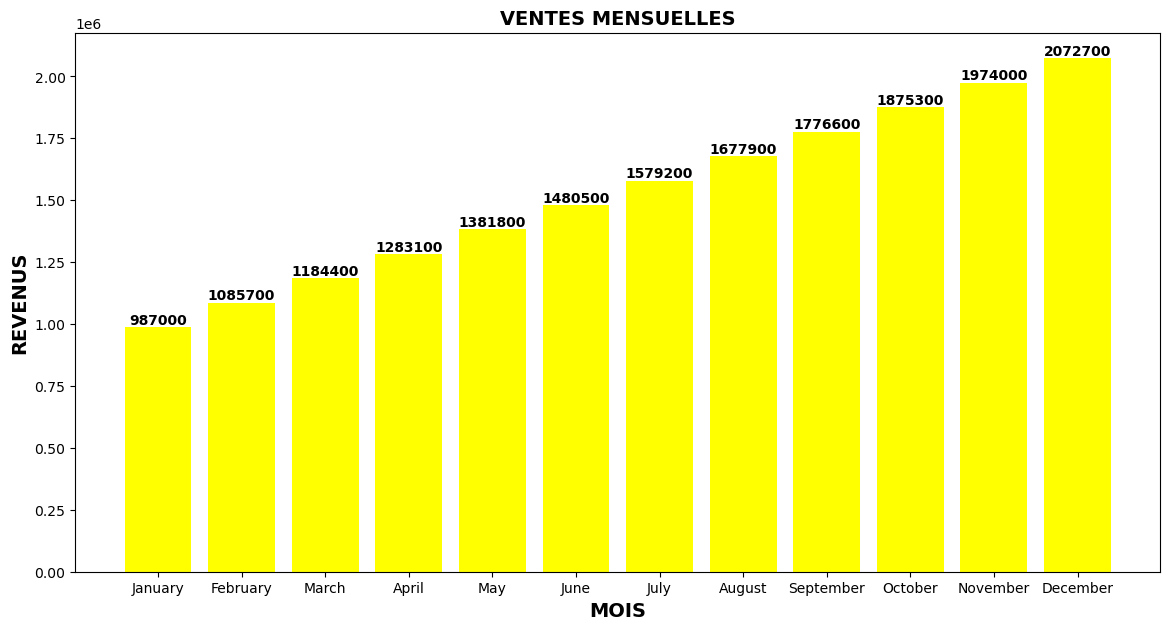

In [139]:


vente = vente_total_mois["Revenue"].tolist()
mois = vente_total_mois.index.tolist()

#Creer le graphique en barres verticales
plt.figure(figsize = (14,7))
plt.bar(mois,vente, color='Yellow')

# Affichage des valeurs dans chaque barre
for i, revenu in enumerate(vente):
    plt.text(i, revenu, str(revenu), ha='center', va='bottom',weight='bold', size = 10)

# Titres et labels des axes
plt.title('VENTES MENSUELLES',size = 14, weight='bold')
plt.xlabel('MOIS',size = 14, weight='bold')
plt.ylabel('REVENUS',size = 14, weight='bold')

# Affichage du graphique
plt.show()



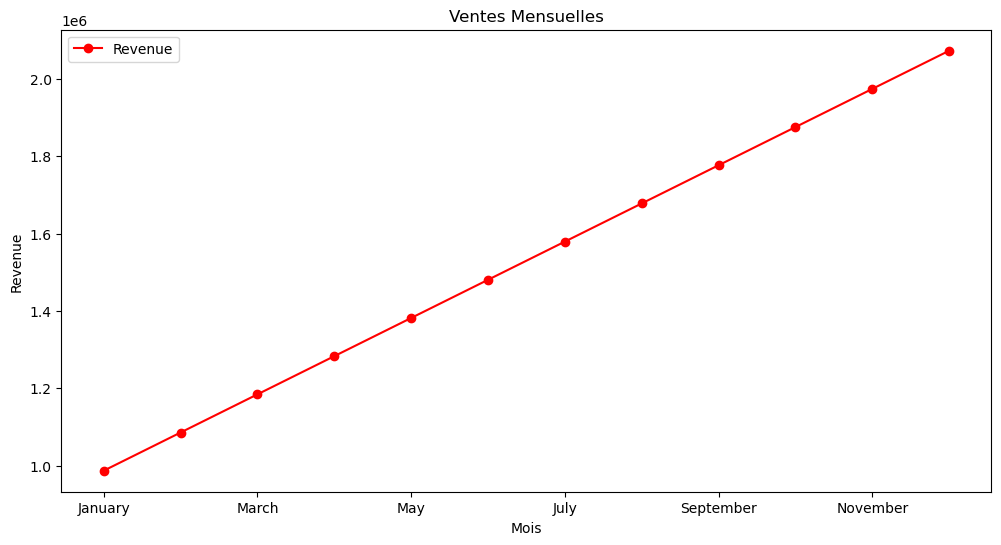

In [72]:
# Créons des graphiques supplémentaires pour mettre en évidence les tendances de vente et les produits les plus populaires
vente_total_mois.plot(kind="line" , color = 'red', marker = "o",figsize =(12,6))
plt.title("Ventes Mensuelles")
plt.xlabel('Mois')
plt.ylabel('Revenue')
plt.show()



In [53]:
product_tendance = data.groupby(["Product"])[["quantity"]].sum().sort_values("quantity", ascending = False)


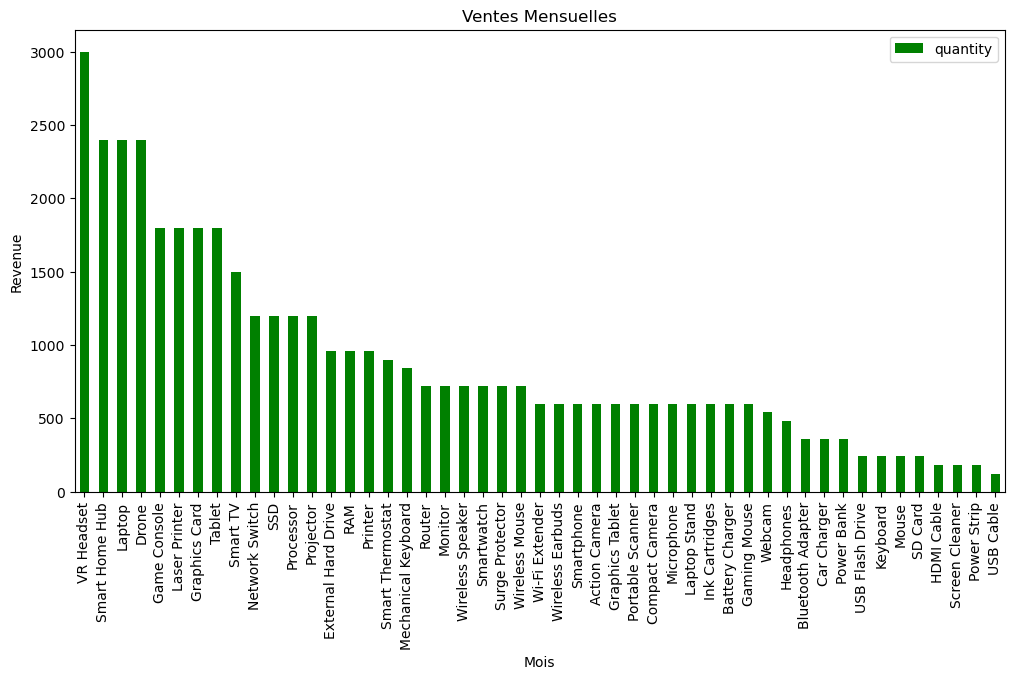

In [71]:
# graphe produit le plus vendu
#plt.figure(figsize = (25,10))
product_tendance.plot(kind="bar" , color = 'green', figsize =(12,6),)
plt.title("Ventes Mensuelles")
plt.xlabel('Mois',)
plt.ylabel('Revenue')
plt.show()

In [84]:
#le produit qui ont le plus grand revenue
product_tendance_r = data.groupby(["Product"])[["Revenue"]].sum().sort_values("Revenue", ascending = False)
product_tendance_r

,Revenue
Product,
Laptop,1860000
Smartphone,930000
Tablet,837000
Monitor,781200
Smart Home Hub,744000
Processor,744000
Game Console,697500
Wireless Speaker,669600
Headphones,595200


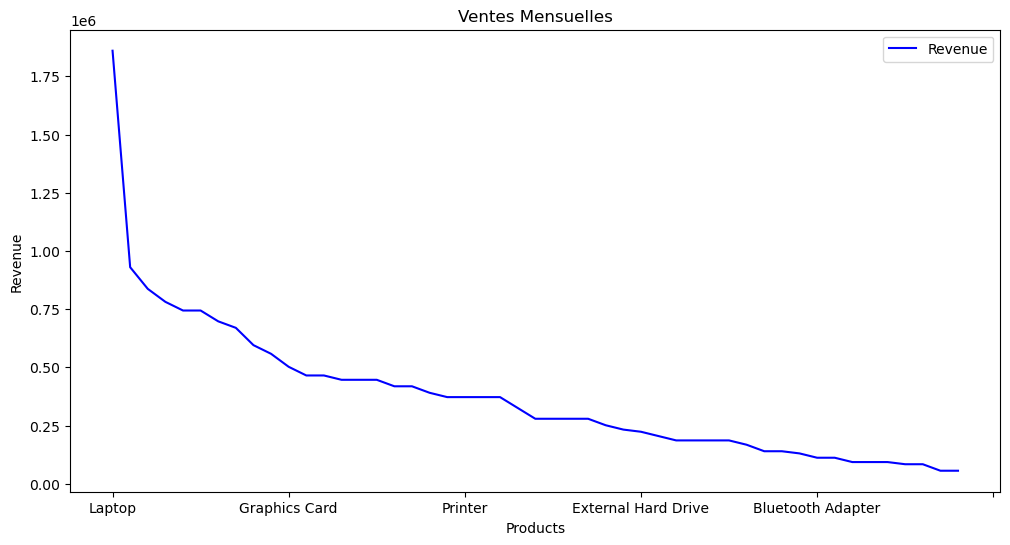

In [78]:
product_tendance_r.plot(kind="line" , color = 'blue', figsize =(12,6),)
plt.title("Ventes Mensuelles")
plt.xlabel('Products',)
plt.ylabel('Revenue')
plt.show()

In [126]:
#les products qui sorte le plus 
products = data.groupby(["Month","Product"])["Revenue"].sum()
product_tendance_top = products.groupby(["Month"], group_keys=False).nlargest(5)
#les products qui ont plus de la valeur
#product_tendance_top = data.groupby(["Product"])[["Revenue"]].sum().sort_values("Revenue", ascending = False).head(5)
product_tendance_top


Month      Product   
April      Laptop        130000
           Smartphone     65000
           Tablet         58500
           Monitor        54600
           Processor      52000
August     Laptop        170000
           Smartphone     85000
           Tablet         76500
           Monitor        71400
           Processor      68000
December   Laptop        210000
           Smartphone    105000
           Tablet         94500
           Monitor        88200
           Processor      84000
February   Laptop        110000
           Smartphone     55000
           Tablet         49500
           Monitor        46200
           Processor      44000
January    Laptop        100000
           Smartphone     50000
           Tablet         45000
           Monitor        42000
           Processor      40000
July       Laptop        160000
           Smartphone     80000
           Tablet         72000
           Monitor        67200
           Processor      64000
June       Laptop 

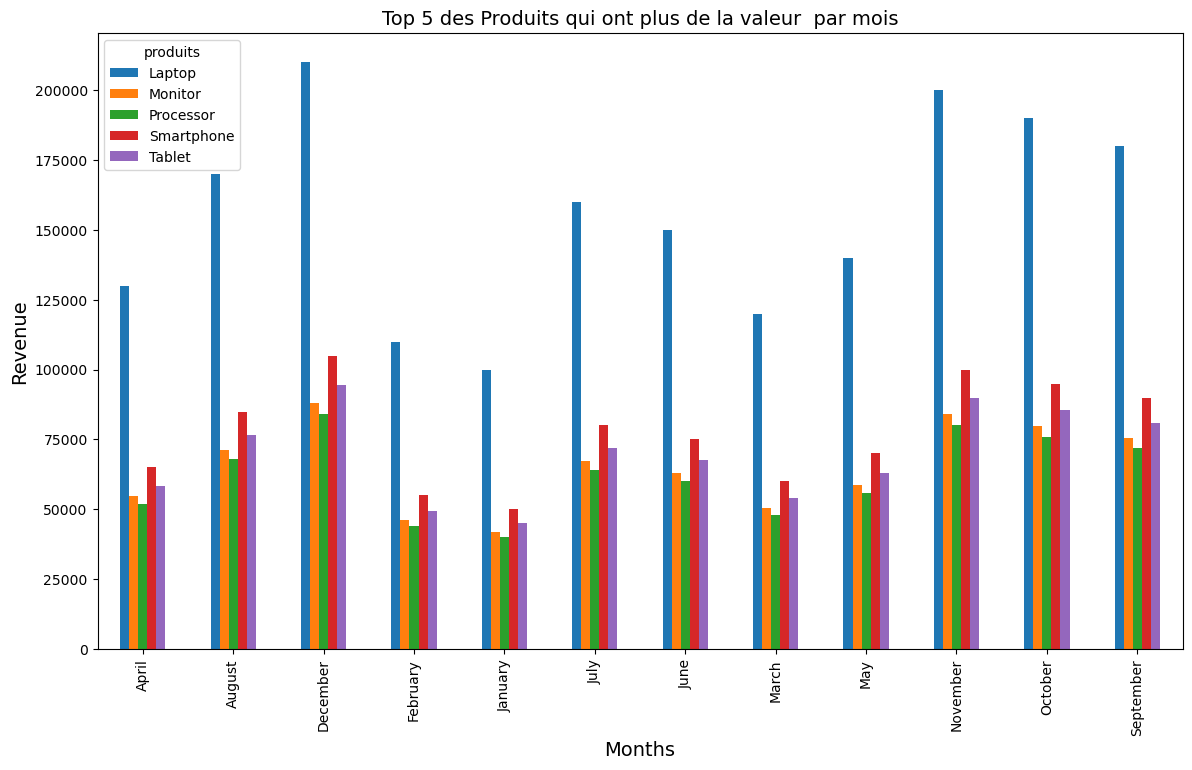

In [127]:
product_tendance_top.unstack().plot(kind="bar", stacked=False, figsize =(14,8))

#personnnaliser le graphe

plt.xlabel("Months", size = 14)
plt.ylabel("Revenue", size = 14)
plt.title("Top 5 des Produits qui ont plus de la valeur  par mois", size = 14)
plt.legend(title = "produits")

In [119]:
#les products qui sorte le plus 
products = data.groupby(["Month","Product"])["quantity"].sum()
top_5 = products.groupby(["Month"], group_keys=False).nlargest(5)

#product_tendance_top_s = data.groupby(["Product"])[["quantity"]].sum().sort_values("quantity", ascending = False).head(5)
#product_tendance_top_s
top_5

Month      Product       
April      VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
August     VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
December   VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
February   VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
January    VR Headset        250.0
           Drone             200.0
           Laptop            200.0
           Smart Home Hub    200.0
           Game Console      150.0
July       VR Headset        250.0
           Drone             200.0
           Laptop            

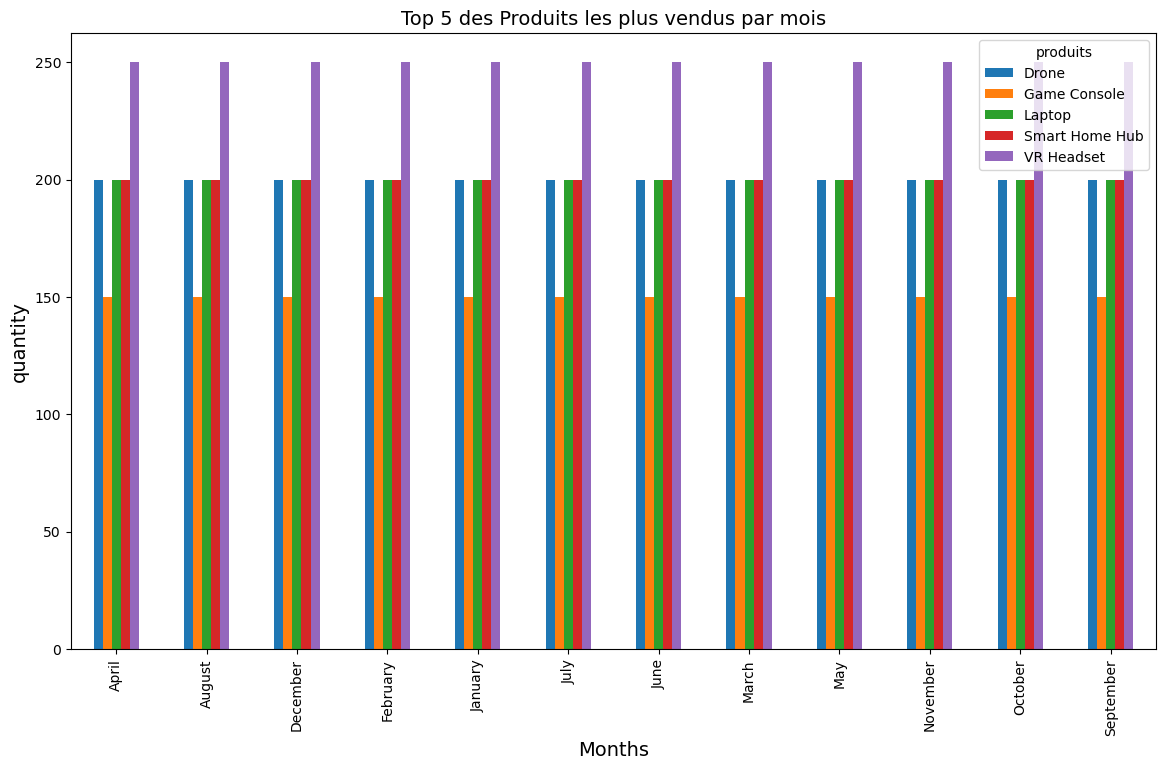

In [121]:
top_5.unstack().plot(kind="bar", stacked=False, figsize =(14,8))

#personnnaliser le graphe

plt.xlabel("Months", size = 14)
plt.ylabel("quantity", size = 14)
plt.title("Top 5 des Produits les plus vendus par mois", size = 14)
plt.legend(title = "produits")

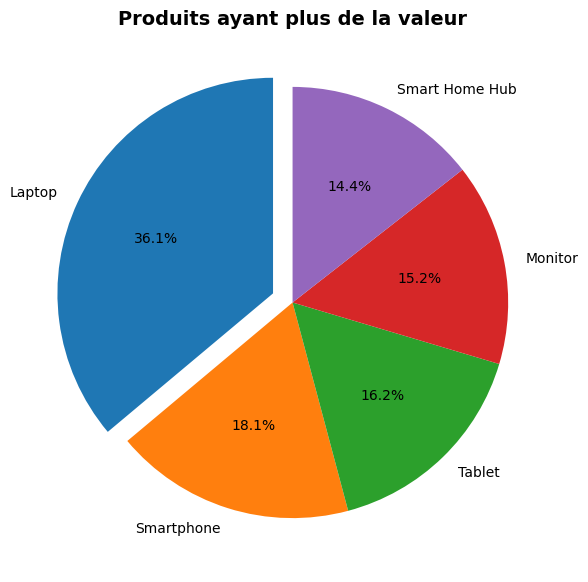

In [142]:

product_sales = data.groupby("Product").sum()["Revenue"]


sorted_sales = product_sales.sort_values(ascending=False)


top_5_products = sorted_sales.head(5)


plt.figure(figsize = (12,7))
plt.pie(top_5_products.values, labels=top_5_products.index, autopct="%1.1f%%",explode=(0.1, 0, 0, 0, 0), startangle=90)

plt.title("Produits ayant plus de la valeur", size = 14, weight='bold')
plt.show()

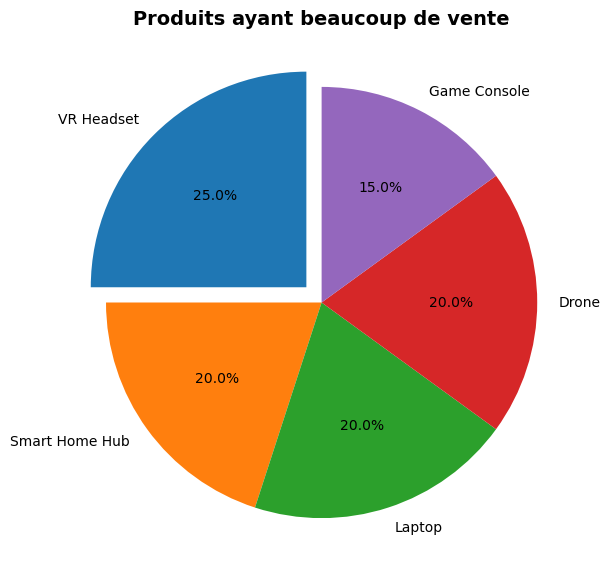

In [152]:

product_sales = data.groupby("Product").sum()["quantity"]

sorted_sales = product_sales.sort_values(ascending=False)
top_5_products = sorted_sales.head(5)

plt.figure(figsize = (12,7))
plt.pie(top_5_products.values, labels=top_5_products.index, autopct="%1.1f%%",explode=(0.1, 0, 0, 0, 0), startangle=90)

plt.title("Produits ayant beaucoup de vente", size = 14, weight='bold')
plt.show()